In [1]:
from fastcore.all import *
from fastai.vision.all import *
from fastai.data.all import *

In [2]:
path = '/kaggle/input/birds-vs-drone-dataset/BirdVsDrone'

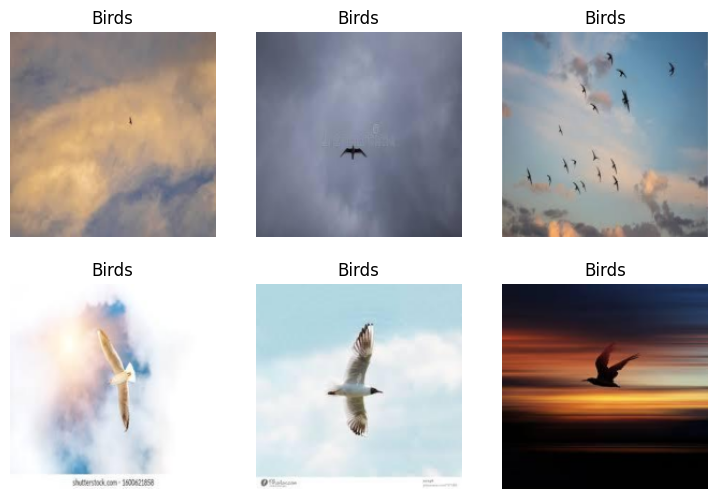

In [3]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [4]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 138MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.578949,0.129971,0.036364,00:08


epoch,train_loss,valid_loss,error_rate,time
0,0.139193,0.075237,0.024242,00:06
1,0.099686,0.156562,0.030303,00:06
2,0.069611,0.091975,0.030303,00:06
3,0.050365,0.069393,0.018182,00:06


In [5]:
is_bird,_,probs = learn.predict(PILImage.create('/kaggle/input/birds-vs-drone-dataset/BirdVsDrone/Drones/101.JPEG'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: Drones.
Probability it's a bird: 0.0000
